# DLP

$g^x = h, x - ?$

# BSGS

$Gs = [e, g, g^2, g^3, ..., g^m$

$Hs = [h * g^{-m}, h * g^{-2m},..., h * g^{-m^2}]$

$g^i = h * g^{-j m} \implies g^{i + j m} = h \implies x = i + j m \pmod{ord(g)}$

In [1]:
def babystep_giantstep(g, h):
    n = g.multiplicative_order()
    m = 1 + ceil(sqrt(n))

    lg = {}
    gi = 1
    for i in range(m):
        lg[gi] = i
        gi *= g

    invg = g ** (-m)
    hi = h
    for j in range(m + 1):
        if hi in lg:
            i = lg[hi]
            return i + j * m
        hi *= invg

# Парадокс дней рождений

Допустим у вас есть набор из $n$ элементов. Какова вероятность того, что выбирав наугад $m$ элементов, хотя бы два из них будут одинаковые?

Пусть $P(n, m)$ - Вероятность того, что хотя бы два элемента совпадают, а $P_1(n, m)$ - не совпадает ни один элемент. $P(n, m) = 1 - P_1(n, m)$

$P_1(n, m) = (1 - \frac{1}{n})(1 - \frac{2}{n})(1-\frac{3}{n})...(1-\frac{m-1}{n})$

Из МатАна мы знаем, что $1 - x \approx e^{-x}, x \to 0$

Тогда интуитивно $P_1(n, m) \approx e^{-\frac{1}{n}} * ... * e^{-\frac{m}{n}} = e^{-\frac{1 + 2 + ... + m-1}{n}$

$P_1(n, m) \approx e^{-\frac{m^2}{n}} = e^{-\lambda}$

$P(n, m) = 1 - e^{-\lambda}$

Еcли возьмем $\lambda = 3$, то получим $m = \sqrt{3 * n}$

In [2]:
def birthday_algo(g, h):
    n = g.multiplicative_order()
    m = floor(3 * sqrt(n))

    gs = {}
    hs = {}

    for i in range(m):
        a = randint(0, n)
        ga = pow(g, a)
        gs[ga] = a

        if ga in hs:
            return a - hs[ga]  # not modded

        a = randint(0, n)
        ha = pow(g, a) * h
        hs[ha] = a

        if ha in gs:
            return gs[ha] - a

# Поллард

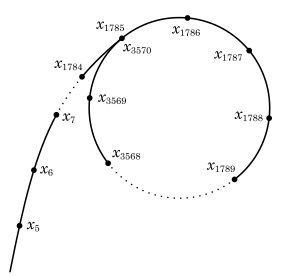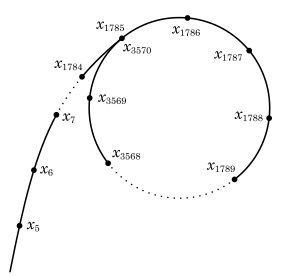



In [3]:
def getPowers(a, x, g, h, p, k=1):
    ax, bx = a

    N = p
    if int(x) < N // 3:
        ax += 1
        x *= g
    elif int(x) >= N // 3 and int(x) < 2 * N // 3:
        ax *= 2
        bx *= 2
        x = x**2
    else:
        bx += 1
        x *= h

    return (ax, bx), x


def pollard_rho(g, h, p, ord):
    N = ord
    Pm = Zmod(N)

    ex = (Pm(0), Pm(0))
    ey = (Pm(0), Pm(0))

    G = GF(p**k)
    x, y = G(1), G(1)
    while True:
        ex, x = getPowers(ex, x, g, h, p, k)

        ey, y = getPowers(ey, y, g, h, p, k)
        ey, y = getPowers(ey, y, g, h, p, k)

        if x == y:
            break

    u = int(ex[0] - ey[0])
    v = int(ey[1] - ex[1])
    d = gcd(v, N)
    assert u % d == 0

    u //= d
    N //= d
    v //= d

    res = Pm(pow(v, -1, N) * u)
    dlp = []
    for k in range(d):
        dlp.append(res + k * N)

    return dlp

# Полиг-Хеллман

$ord(g) = p_1^{e_1} * p_2^{e_2} * ...$

$g_1 = g^{\frac{ord(g)}{p_1^{e_1}}}$

$ord(g_1) = p_1^{e_1}$

$g_1^x = h_1$

$x \pmod{p_1^{e_1}} = x_{(1, 1)} + x_{(1, 2)} * p + x_{(1, 3)} * p^2 + ...$

$h_1 = g_1^{x_{(1, 1)} + x_{(1, 2)} * p + x_{(1, 3)} * p^2 + ...}$

$g_{(1, 1)} = g_1^{p_1^{e_1 - 1}}, ord(g_{(1, 1)}) = p_1$ - Находим как-нибудь $x_{(1, 1)}$. 


$h_1 * g_1^{-x_{(1, 1)}} = (g_1^{p_1})^{x_{(1, 2)} + ..}$

In [9]:
p = 4216863803

In [11]:
p = 311414346572387